# What Makes a White Vinho Verde Wine? 

### What are Vinho Verde Wines?
Vinho Verde is a unique product from the Minho (northwest) region of Portugal. Medium in alcohol is it particularly appreciated due to its freshness (especially in the summer).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#jupyter intelisense
%config IPCompleter.greedy=True

### Reading the Data
First, we need to read the CVS file taken from the UCI repository and take a peak on what information we have. Using the .info ( ) and .describe ( ) it shows that we have a total of $ 12 $ columns with $ 4898 $ entries to analyze.

In [3]:
winedata_df = pd.read_csv('downloads/winequality-white.csv', sep=";")
#removing the spaces from the original data and replace with '_'
winedata_df.columns = winedata_df.columns.str.strip().str.lower().str.replace(' ', '_')

winedata_df.info()
winedata_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
fixed_acidity           4898 non-null float64
volatile_acidity        4898 non-null float64
citric_acid             4898 non-null float64
residual_sugar          4898 non-null float64
chlorides               4898 non-null float64
free_sulfur_dioxide     4898 non-null float64
total_sulfur_dioxide    4898 non-null float64
density                 4898 non-null float64
ph                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null int64
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


### Why do people drink wine? 
Wine causes your brain to release _'feel good'_ hormones such as serotonin and dopamine. 

#### Is it OK to drink wine every day? 
Wine can be _relaxing_ and have potential health benefits when taken in moderation. Wine is rich in antioxidants, which may help to protect the lining of blood vessels in the body and the heart.

***


## 1. Is there a correlation between the alcohol percentage and the quality of the wine?
The effects/benefits that wine gives us is one of the reasons why we enjoy consuming them. One would say that higher quality wine would have higher alcohol content. Let's look at the data to see if there is a relationship between the two data.

In [4]:
#naming the data
alc = winedata_df.alcohol
q = winedata_df.quality

Grouping the alcohol against the quality and getting the mean will narrow down our data to the  two items that we want to review.

In [5]:
groupby_acl= winedata_df['quality'].groupby([alc.round()])
qualitybyalc_df = groupby_acl.mean().reset_index()
#quick peak of the data
qualitybyalc_df [:5]

,alcohol,quality
0,8.0,5.142857
1,9.0,5.501675
2,10.0,5.635887
3,11.0,6.021277
4,12.0,6.377261


#### Let's plot the data!

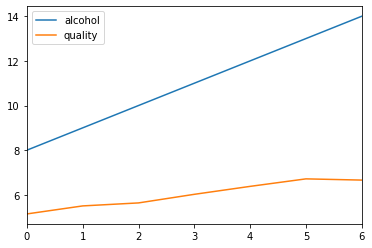

In [6]:
qualitybyalc_df.plot()

**Data Shows** that the alcohol level increases as the quality of the wine slightly increase. Take note that the quality data range is from $ 0 - 10 $. This coincides with what a Vinho Verde wine is, they are medium in alcohol.

***

## 2. What is the distribution of alcohol content?
The prior data shows that the highest alcohol content falls under quality 6. I'm curious to see what's the distribution for this data.

In [7]:
groupby_acl= winedata_df['quality'].groupby([alc])
qualitybyalc_df = groupby_acl.mean().reset_index()
x = qualitybyalc_df['alcohol']
y = qualitybyalc_df['quality']
#converting the data to a list
x = x.tolist()
y = y.tolist()
#exclude the outliers
x.pop()
y.pop()

7.0

#### Let's plot the data!

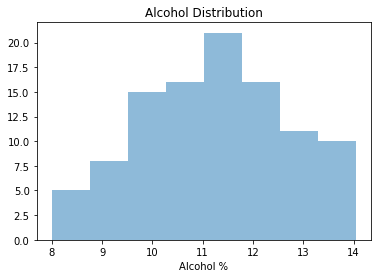

In [8]:
plt.hist(x, bins='auto', alpha=.5) 

plt.title('Alcohol Distribution')
plt.xlabel('Alcohol %')

plt.show()


**Data Shows** that most of the alcohol level falls under the $ 11% - 12% $ range. Good to know! 

***

## 3. What about sugar level?
Sugar is having a bad reputation these days and we want to know if higher alcohol content means that it contains higher level of sugar.

In [9]:
sug = winedata_df.residual_sugar
groupby_sug = winedata_df['quality'].groupby([sug])
qualitybysug_df = groupby_sug.mean().reset_index()
qualitybysug_df [:5]

,residual_sugar,quality
0,0.60,5.000000
1,0.70,4.857143
2,0.80,5.240000
3,0.90,5.615385
4,0.95,5.000000


In [10]:
x2 = qualitybysug_df['residual_sugar']
y2 = qualitybysug_df['quality']
x2 = x2.tolist()
y2 = y2.tolist()
x2.pop()
y2.pop()

6.0

#### Let's plot the data!

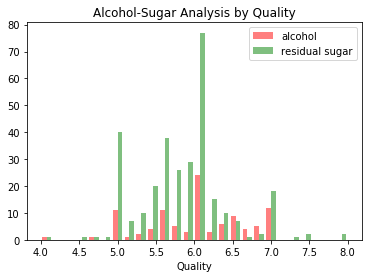

In [11]:
plt.hist([y,y2], bins= 'auto',  color=['red','green'], label=['alcohol','residual sugar'], \
         alpha=.5) 
plt.title('Alcohol-Sugar Analysis by Quality')
plt.xlabel('Quality')
plt.legend()
plt.show()

**Data Shows** that the higher the alcohol content the higher the sugar content it has. This wine is popularly served during summer time. It's refreshing, sweet and relaxes you under the bright hot sun.


## Future Research
It would be interesting to see all the chemicals and characteristics being plotted against each other and compare what quality it would fall under. This information would lead to asking, "How to predict the quality a bottle of Vinho Verde wine?"  This dataset also includes red wine data and we could also apply the same steps and compare it to white wine.

***

**Citation:**
  This dataset is public available for research. The details are described in [Cortez et al., 2009]. 

  P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. 
  Modeling wine preferences by data mining from physicochemical properties.
  In Decision Support Systems, Elsevier, 47(4):547-553. ISSN: 0167-9236.

  Available at: [@Elsevier] http://dx.doi.org/10.1016/j.dss.2009.05.016
                [Pre-press (pdf)] http://www3.dsi.uminho.pt/pcortez/winequality09.pdf
                [bib] http://www3.dsi.uminho.pt/pcortez/dss09.bib